## Lauren Thompson

In [52]:
import thinkstats2
import thinkplot
import first
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline


In [53]:
df = pd.read_excel (r'housing.xlsx')

In [54]:
df.head()

,Sale Date,Sale Price,sale_reason,sale_instrument,sale_warning,sitetype,addr_full,zip5,ctyname,postalctyn,...,bedrooms,bath_full_count,bath_half_count,bath_3qtr_count,year_built,year_renovated,current_zoning,sq_ft_lot,prop_type,present_use
0,2006-01-03,698000,1,3,NaN,R1,17021 NE 113TH CT,98052,REDMOND,REDMOND,...,4,2,1,0,2003,0,R4,6635,R,2
1,2006-01-03,649990,1,3,NaN,R1,11927 178TH PL NE,98052,REDMOND,REDMOND,...,4,2,0,1,2006,0,R4,5570,R,2
2,2006-01-03,572500,1,3,NaN,R1,13315 174TH AVE NE,98052,NaN,REDMOND,...,4,1,1,1,1987,0,R6,8444,R,2
3,2006-01-03,420000,1,3,NaN,R1,3303 178TH AVE NE,98052,REDMOND,REDMOND,...,3,1,0,1,1968,0,R4,9600,R,2
4,2006-01-03,369900,1,3,15,R1,16126 NE 108TH CT,98052,REDMOND,REDMOND,...,3,1,0,1,1980,0,R6,7526,R,2


In [55]:
df = df.drop(columns=['sale_reason', 'sale_instrument', 'sale_warning', 'sitetype', 'ctyname', 'lon', 'lat', 'building_grade', 'prop_type', 'present_use'])

In [56]:
df

,Sale Date,Sale Price,addr_full,zip5,postalctyn,square_feet_total_living,bedrooms,bath_full_count,bath_half_count,bath_3qtr_count,year_built,year_renovated,current_zoning,sq_ft_lot
0,2006-01-03,698000,17021 NE 113TH CT,98052,REDMOND,2810,4,2,1,0,2003,0,R4,6635
1,2006-01-03,649990,11927 178TH PL NE,98052,REDMOND,2880,4,2,0,1,2006,0,R4,5570
2,2006-01-03,572500,13315 174TH AVE NE,98052,REDMOND,2770,4,1,1,1,1987,0,R6,8444
3,2006-01-03,420000,3303 178TH AVE NE,98052,REDMOND,1620,3,1,0,1,1968,0,R4,9600
4,2006-01-03,369900,16126 NE 108TH CT,98052,REDMOND,1440,3,1,0,1,1980,0,R6,7526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12860,2016-12-15,798930,22506 NE 102ND PL,98053,REDMOND,2920,3,2,1,0,2001,0,URPSO,5487
12861,2016-12-15,750000,13315 175TH AVE NE,98052,REDMOND,2320,4,1,1,1,1980,0,R6,35048
12862,2016-12-15,629000,17716 NE 29TH ST,98052,REDMOND,2000,4,1,0,1,1967,0,R4,9600
12863,2016-12-16,835000,9917 182ND CT NE,98052,REDMOND,2460,4,2,1,0,1990,0,R4,7615


In [57]:
df = df.dropna()
df = df.rename(columns={'Sale Date': 'sale_date', 'Sale Price': 'sale_price', 'postalctyn': 'city_name'})
df

,sale_date,sale_price,addr_full,zip5,city_name,square_feet_total_living,bedrooms,bath_full_count,bath_half_count,bath_3qtr_count,year_built,year_renovated,current_zoning,sq_ft_lot
0,2006-01-03,698000,17021 NE 113TH CT,98052,REDMOND,2810,4,2,1,0,2003,0,R4,6635
1,2006-01-03,649990,11927 178TH PL NE,98052,REDMOND,2880,4,2,0,1,2006,0,R4,5570
2,2006-01-03,572500,13315 174TH AVE NE,98052,REDMOND,2770,4,1,1,1,1987,0,R6,8444
3,2006-01-03,420000,3303 178TH AVE NE,98052,REDMOND,1620,3,1,0,1,1968,0,R4,9600
4,2006-01-03,369900,16126 NE 108TH CT,98052,REDMOND,1440,3,1,0,1,1980,0,R6,7526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12860,2016-12-15,798930,22506 NE 102ND PL,98053,REDMOND,2920,3,2,1,0,2001,0,URPSO,5487
12861,2016-12-15,750000,13315 175TH AVE NE,98052,REDMOND,2320,4,1,1,1,1980,0,R6,35048
12862,2016-12-15,629000,17716 NE 29TH ST,98052,REDMOND,2000,4,1,0,1,1967,0,R4,9600
12863,2016-12-16,835000,9917 182ND CT NE,98052,REDMOND,2460,4,2,1,0,1990,0,R4,7615


Text(0, 0.5, 'Sold')

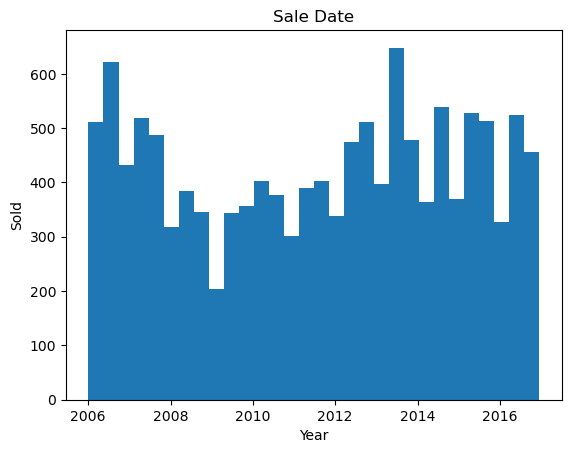

In [58]:
plt.hist(df['sale_date'], 30)
plt.title('Sale Date')
plt.xlabel('Year')
plt.ylabel('Sold')

Text(0, 0.5, 'Sold')

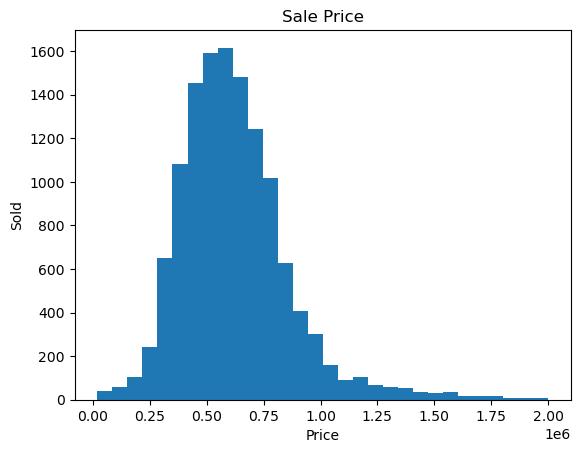

In [59]:
plt.hist(df['sale_price'], 30, range=[20000, 2000000])
plt.title('Sale Price')
plt.xlabel('Price')
plt.ylabel('Sold')

Text(0, 0.5, 'Houses')

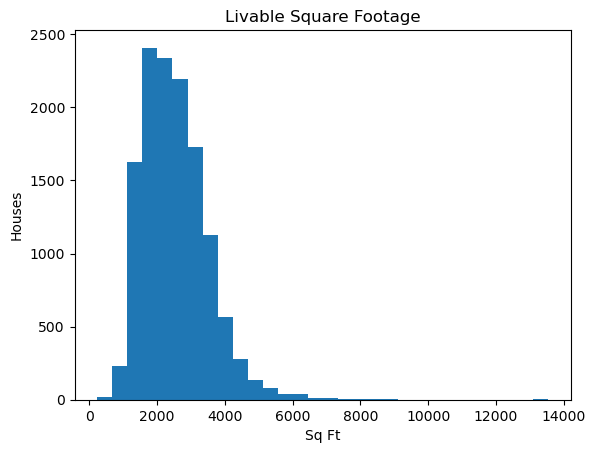

In [60]:
plt.hist(df['square_feet_total_living'], 30)
plt.title('Livable Square Footage')
plt.xlabel('Sq Ft')
plt.ylabel('Houses')

Text(0, 0.5, 'houses')

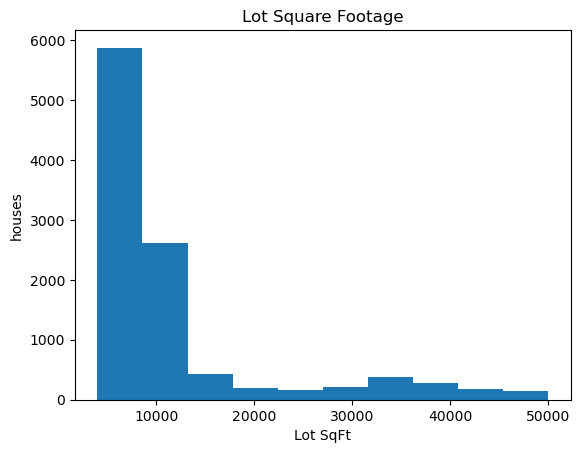

In [61]:
plt.hist(df['sq_ft_lot'], 10,  range=[4000, 50000])
plt.title('Lot Square Footage')
plt.xlabel('Lot SqFt')
plt.ylabel('houses')

Text(0, 0.5, 'Houses')

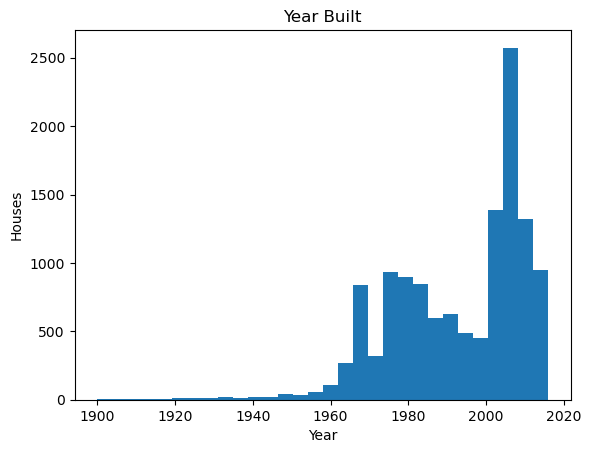

In [62]:
plt.hist(df['year_built'], 30)
plt.title('Year Built')
plt.xlabel('Year')
plt.ylabel('Houses')

In [63]:
np.mean(df.sale_date)

Timestamp('2011-07-28 15:07:32.483482112')

In [64]:
st.mode(df.sale_date)

Timestamp('2008-07-01 00:00:00')

In [65]:
np.mean(df.sale_price)

660737.7496307812

In [66]:
st.mode(df.sale_price)

550000

In [67]:
np.mean(df.square_feet_total_living)

2539.5061795569372

In [68]:
st.mode(df.square_feet_total_living)

1510

In [69]:
np.mean(df.sq_ft_lot)

22228.568208317138

In [70]:
st.mode(df.sq_ft_lot)

8400

In [71]:
np.mean(df.year_built)

1993.002642829382

In [72]:
st.mode(df.year_built)

2007

In [73]:
bath_full_pmf = thinkstats2.Pmf(df.bath_full_count, label="full")
bath_3qtr_pmf = thinkstats2.Pmf(df.bath_3qtr_count, label="3qtr")

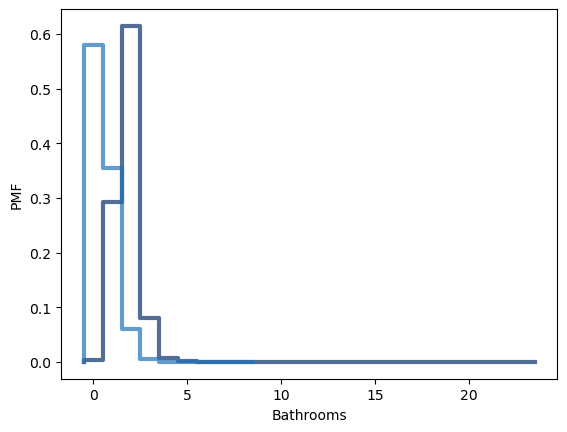

In [74]:
thinkplot.Pmfs([bath_full_pmf, bath_3qtr_pmf])
thinkplot.Config(xlabel="Bathrooms", ylabel="PMF")

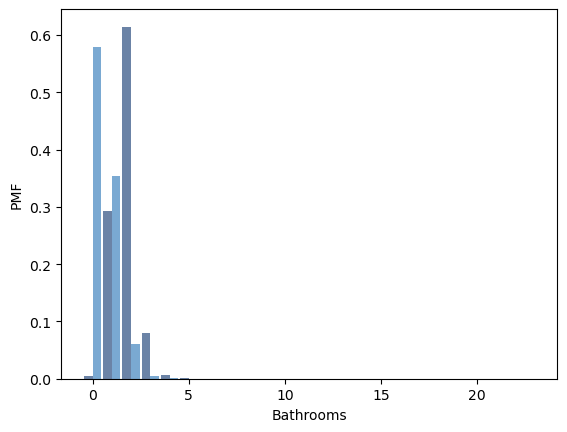

In [75]:
thinkplot.Hist(bath_full_pmf, align="right", width=0.45)
thinkplot.Hist(bath_3qtr_pmf, align="left", width=0.45)
thinkplot.Config(xlabel="Bathrooms", ylabel="PMF")

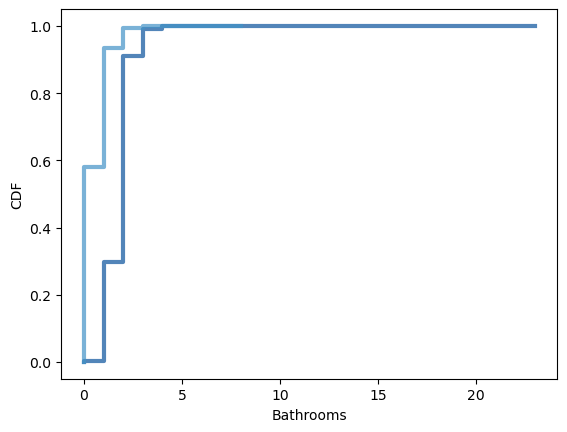

In [76]:
bath_full_cdf = thinkstats2.Cdf(df.bath_full_count, label="full")
bath_3qtr_cdf = thinkstats2.Cdf(df.bath_3qtr_count, label="3qtr")

thinkplot.PrePlot(2)
thinkplot.Cdfs([bath_full_cdf, bath_3qtr_cdf])
thinkplot.Config(xlabel='Bathrooms', ylabel='CDF')


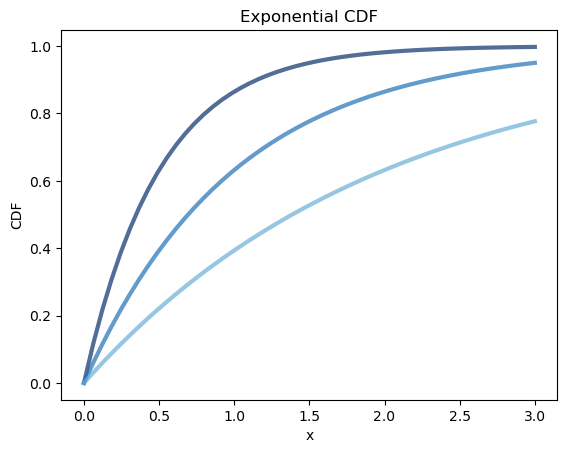

In [77]:
thinkplot.PrePlot(3)
for lam in [2.0, 1, 0.5]:
    xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50)
    label = r"$\lambda=%g$" % lam
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Exponential CDF", xlabel="x", ylabel="CDF", loc="lower right")

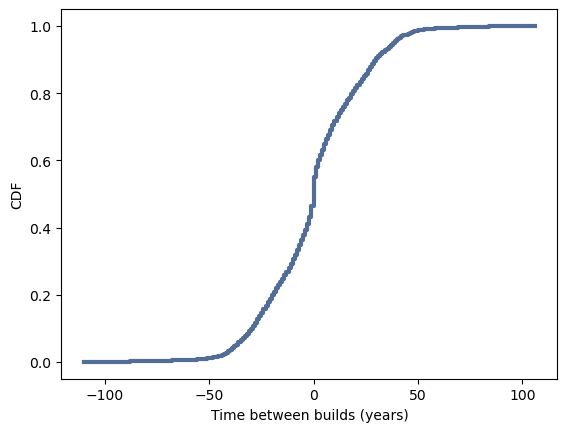

In [78]:
diffs = df.year_built.diff()
cdf = thinkstats2.Cdf(diffs, label="actual")

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="Time between builds (years)", ylabel="CDF")

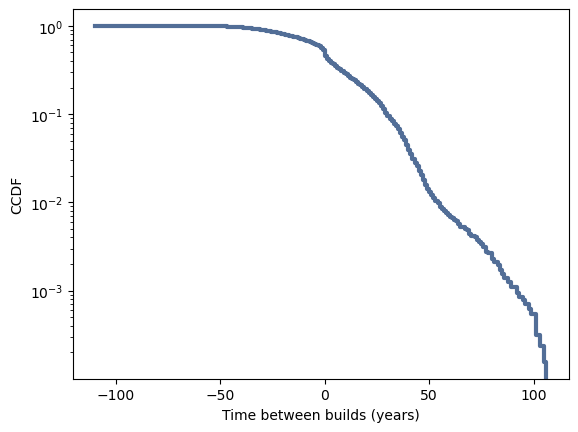

In [79]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(
    xlabel="Time between builds (years)",
    ylabel="CCDF",
    yscale="log",
    loc="upper right",
)

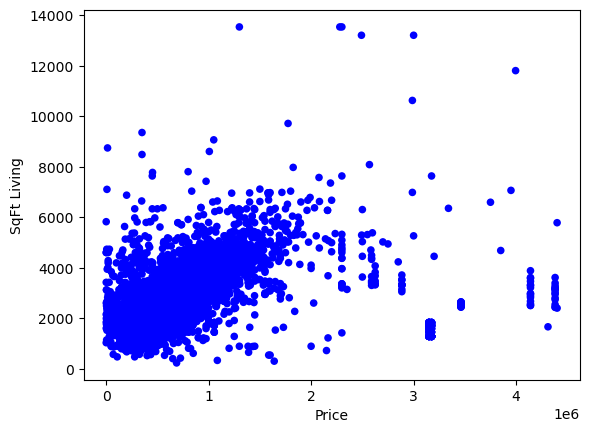

In [80]:
thinkplot.Scatter(df.sale_price, df.square_feet_total_living, alpha=1)
thinkplot.Config(xlabel='Price',
                 ylabel='SqFt Living',
                 legend=False)

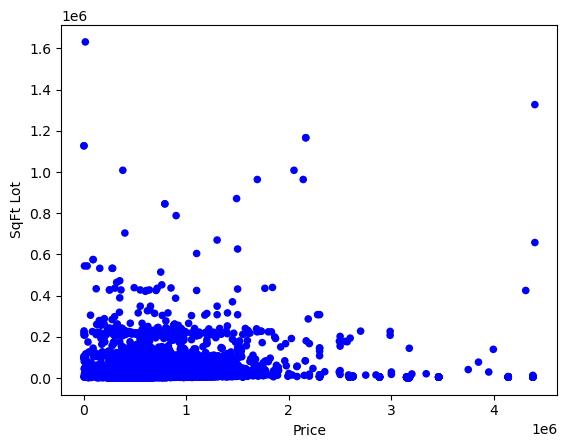

In [81]:
thinkplot.Scatter(df.sale_price,df.sq_ft_lot, alpha=1)
thinkplot.Config(xlabel='Price',
                 ylabel='SqFt Lot',
                 legend=False)

In [82]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [83]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [84]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [85]:
price = df.sale_price
sqft = df.square_feet_total_living
print('Cov', Cov(price, sqft))
print('Corr', Corr(price, sqft))
print('SpearmanCorr', SpearmanCorr(price, sqft))

Cov 181940672.45988375
Corr 0.4545875847238299
SpearmanCorr 0.7068785053389812


In [86]:
price = df.sale_price
sqft_lot = df.sq_ft_lot
print('Cov', Cov(price, sqft_lot))
print('Corr', Corr(price, sqft_lot))
print('SpearmanCorr', SpearmanCorr(price, sqft_lot))

Cov 2758192213.5516663
Corr 0.11981223395960489
SpearmanCorr 0.1610402439997107


In [87]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [94]:
year=[2008]

df_2008=df[df['year_built'].isin(year)]

In [95]:
year=[2012]

df_2012=df[df['year_built'].isin(year)]

In [96]:
data = df_2008.sale_price, df_2012.sale_price
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.286

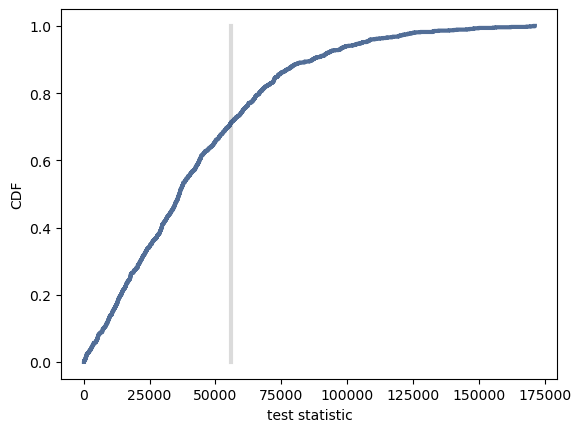

In [97]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

In [98]:
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat

In [99]:
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

0.86

In [100]:
import statsmodels.formula.api as smf

formula = 'sale_price ~ square_feet_total_living'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     3351.
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        08:42:59   Log-Likelihood:            -1.8285e+05
No. Observations:               12865   AIC:                         3.657e+05
Df Residuals:                   12863   BIC:                         3.657e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.891e+05   8744.903     21.625      0.000    1.72e+05    2.06e+05
square_feet_total_living   185.7177      3.208     57.884      0.000     179.429     192.007
==============================================================================
Omnibus:                    14186.450   Durbin-Watson:                   0.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1170497.485
Skew:                           5.725   Prob(JB):                         0.00
Kurtosis:                      48.305   Cond. No.                     7.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
inter = results.params['Intercept']
slope = results.params['square_feet_total_living']
inter, slope

(189106.55899323922, 185.71767788327514)

In [102]:
slope_pvalue = results.pvalues['square_feet_total_living']
slope_pvalue

0.0

In [103]:
results.rsquared

0.20664987218504516

In [104]:
formula = 'sale_price ~ square_feet_total_living + year_built'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     1797.
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        08:43:02   Log-Likelihood:            -1.8276e+05
No. Observations:               12865   AIC:                         3.655e+05
Df Residuals:                   12862   BIC:                         3.655e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -5.114e+06   3.81e+05    -13.431      0.000   -5.86e+06   -4.37e+06
square_feet_total_living   171.4355      3.346     51.242      0.000     164.878     177.993
year_built                2679.0713    192.305     13.931      0.000    2302.125    3056.018
==============================================================================
Omnibus:                    14056.978   Durbin-Watson:                   0.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1120937.659
Skew:                           5.646   Prob(JB):                         0.00
Kurtosis:                      47.313   Cond. No.                     4.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
formula = 'sale_price ~ square_feet_total_living + year_built + bedrooms'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1202.
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        08:43:02   Log-Likelihood:            -1.8275e+05
No. Observations:               12865   AIC:                         3.655e+05
Df Residuals:                   12861   BIC:                         3.655e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -4.858e+06   3.92e+05    -12.407      0.000   -5.63e+06   -4.09e+06
square_feet_total_living   178.4423      4.183     42.662      0.000     170.244     186.641
year_built                2563.6019    196.659     13.036      0.000    2178.121    2949.083
bedrooms                 -1.255e+04   4498.504     -2.790      0.005   -2.14e+04   -3732.184
==============================================================================
Omnibus:                    14073.425   Durbin-Watson:                   0.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1131577.533
Skew:                           5.654   Prob(JB):                         0.00
Kurtosis:                      47.532   Cond. No.                     4.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""